In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Upaloading and Exploring the Data

In [3]:
# Upload into a Dataframe
df = pd.read_csv('Walmart_customer_purchases.csv')
df.head(10)

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
5,fdf82943-1b5f-4e0a-bf42-9a8e2035924e,59,Female,North Josemouth,Electronics,Laptop,2024-02-15,435.48,Cash on Delivery,No,3,No
6,582e8439-2b9b-46bd-93ff-71d610f455cc,47,Male,Johnsonton,Beauty,Perfume,2024-12-19,231.04,Debit Card,No,4,Yes
7,664555b7-7fd7-44a8-b4da-ec00230381b9,23,Other,Hoffmanmouth,Home,Sofa Cover,2024-09-28,240.91,Cash on Delivery,No,2,No
8,a8e37b6a-d34c-4d21-84fc-ef713d4859be,60,Female,South Billyberg,Beauty,Shampoo,2025-01-30,179.76,UPI,Yes,5,Yes
9,fa3bfd3a-99a4-41c7-bebc-8b04dc4c95f7,52,Female,North Katherinemouth,Home,Cookware,2024-12-23,463.43,Cash on Delivery,Yes,3,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


**What's the data's time period?**

In [5]:
# start and end date of the data
start_date = min(df['Purchase_Date'])
end_date = max(df['Purchase_Date'])
print('start date: ', start_date)
print('end date: ', end_date)


start date:  2024-02-10
end date:  2025-02-09


**Exploring location of cities and Walla Walla**

In [6]:
# Walla Walla in the dataset

df[df['City'] == 'Walla Walla']

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer


In [7]:
# is the dataset real time data?? 
# Calculating the average purchase per city over the whole year

print('average amount of purchases per city:', len(df) / len(df['City'].unique()))

average amount of purchases per city: 1.9923493783869939


*This dataset is not based on real time transactions that is why Walla Walla is not on the list*

*there is only 50,000 Walmart purchases and only 2 perchases per city over a whole year*

# Questions

1. **Does older age cause change in purchase behavior**
    - How does getting older change purchase method and amount? Do older people choose a specific method like cash payment? 
    - Do older people tend to apply more discounts? (testing an assumption)
2. **here**

    -

---------

# How does getting older change purchase behavior

In [34]:
# Scalling the Age and Purhcase_Amount to standard deviation

scaler = StandardScaler() # StandardScaler object

list_scalled = scaler.fit_transform(df[['Age', 'Purchase_Amount']])

df_scalled = pd.DataFrame(list_scalled, columns=df[['Age', 'Purchase_Amount']].columns) # Creating a dataframe of the scalled list
df_scalled

,Age,Purchase_Amount
0,0.810999,-0.016050
1,-0.237556,-1.287973
2,1.052974,-0.917634
3,0.649683,1.375882
4,0.327051,0.803457
...,...,...
49995,0.730341,0.960266
49996,0.972315,0.116956
49997,0.972315,0.178549
49998,-0.479530,-0.810834


In [35]:
# adding the payment methods column 
df_scalled['Payment_Method'] = df['Payment_Method'].copy()
df_scalled


,Age,Purchase_Amount,Payment_Method
0,0.810999,-0.016050,Cash on Delivery
1,-0.237556,-1.287973,Debit Card
2,1.052974,-0.917634,Credit Card
3,0.649683,1.375882,Credit Card
4,0.327051,0.803457,Credit Card
...,...,...,...
49995,0.730341,0.960266,Debit Card
49996,0.972315,0.116956,Cash on Delivery
49997,0.972315,0.178549,Debit Card
49998,-0.479530,-0.810834,Debit Card


In [36]:
# Grouping the mean of age and purhcase amount per payment method

df_payment_method_grp = df_scalled.groupby('Payment_Method').mean()
df_payment_method_grp = df_payment_method_grp.reset_index()
df_payment_method_grp

,Payment_Method,Age,Purchase_Amount
0,Cash on Delivery,-0.005748,0.001496
1,Credit Card,0.011488,-0.002041
2,Debit Card,-0.008011,-0.004216
3,UPI,0.002322,0.004839


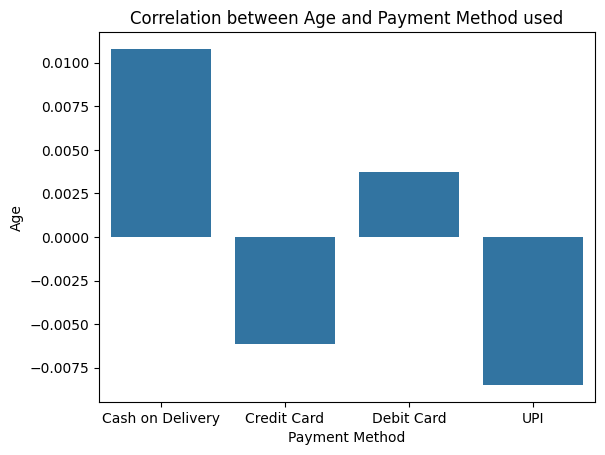

In [ ]:
# Ploting Age
sns.barplot(x = 'Payment_Method', y= 'Age', data = df_payment_method_grp)
plt.title('Correlation between Age and Payment Method used')
plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.show()

In [37]:
# Ploting purchase amount in correlation with age
sns.barplot(x = 'Purhcase_Amount', y= 'Age', data = df_payment_method_grp)
plt.title('Correlation between Age and Payment Method used')
plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.show()

ValueError: Could not interpret value `Purhcase_Amount` for `x`. An entry with this name does not appear in `data`.